# Multi-Class Classification and Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import scipy.optimize as op

from utilities import plot_mnist_result

In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

### Multi-Class Classification

In [3]:
mat = scipy.io.loadmat('ex3/ex3data1.mat')
X = mat['X']
y = mat['y']

In [4]:
np.min(X), np.max(X)

(-0.13196323019852488, 1.1276882991588879)

In [5]:
set(y.flatten())

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [6]:
num_labels = len(set(y.flatten()))

In [7]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


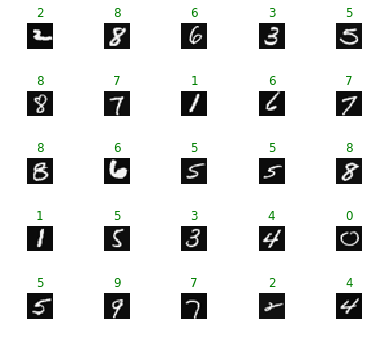

In [8]:
plot_mnist_result(X, y, prediction=y)

In [9]:
def sigmoid(z):
    return np.divide(1., 1 + np.exp(-z))

In [10]:
def logistic_cost(θ, X, y, λ, regularized=True):
    m = y.shape[0]
    h = sigmoid(np.dot(X, θ))
    cost = -1. / m * np.sum(np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))

    if regularized:
        θ_reg = np.copy(θ)
        θ_reg[0] = 0
        penalty = λ / (2 * m) * np.sum(np.dot(θ_reg.T, θ_reg))
        cost += penalty

    return cost

In [11]:
def logistic_gradient(θ, X, y, λ, regularized=True):
    # ensure column otherwise scipy.optimize messes up
    if θ.ndim == 1:
        θ = θ[:, np.newaxis]

    m = y.shape[0]
    h = sigmoid(np.dot(X, θ))
    gradient = np.dot(X.T, h - y) / m

    if regularized:
        θ_reg = np.copy(θ)
        θ_reg[0] = 0
        penalty = λ / m * θ_reg
        gradient += penalty

    return gradient.flatten()

In [12]:
def train_one_vs_all(X, y, num_labels, λ, cost_func, grad_func, epsilon=0.01):
    m, n = X.shape
    X = np.insert(X, 0, values=1, axis=1)

    θ_all = np.zeros((num_labels, n + 1))
    θ_initial = np.random.uniform(-epsilon, epsilon, size=(n + 1, 1))
    
    for i in range(num_labels):
        θ_all[i, :] = op.minimize(
            fun=cost_func, 
            x0=θ_initial,
            args=(X, (y == i + 1).astype(int), λ),
            options={'disp': False, 'maxiter':50}, 
            method="CG",
            jac=grad_func).x

    return θ_all

In [13]:
def predict_one_vs_all(X):
    θ_all = train_one_vs_all(X, y, num_labels, 0.1, logistic_cost, logistic_gradient)
    X = np.insert(X, 0, values=1, axis=1)
    h = sigmoid(np.dot(X, θ_all.T))
    return np.argmax(h, axis=1)

In [14]:
prediction = predict_one_vs_all(X) + 1
accuracy = np.mean(prediction == y.flatten()) * 100
print('Training Set Accuracy: %.2f%%' % accuracy)

Training Set Accuracy: 94.98%


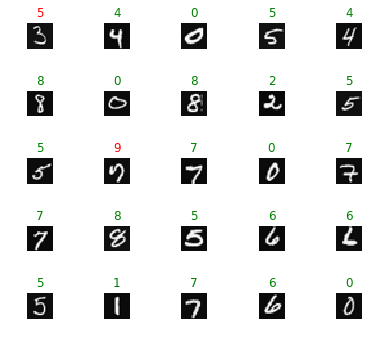

In [16]:
plot_mnist_result(X, y, prediction)

### Neural Networks

In [17]:
mat = scipy.io.loadmat('ex3/ex3weights.mat')
θ1 = mat['Theta1']
θ2 = mat['Theta2']

In [18]:
def feedforward(X, weights):
    m = X.shape[0]
    a = X.copy()
    for θ in weights:
        z = np.dot(np.hstack((np.ones((m, 1)), a)), θ.T)
        a = sigmoid(z)
    return a

In [19]:
prediction_nn = np.argmax(feedforward(X, [θ1, θ2]), axis=1) + 1
accuracy = np.mean(prediction_nn == y.flatten()) * 100
print('Training Set Accuracy: %.2f%%' % accuracy)

Training Set Accuracy: 97.52%


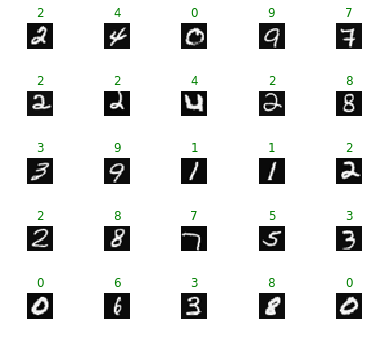

In [20]:
plot_mnist_result(X, y, prediction_nn)